# 固有値と固有ベクトルの意味を理解する(2022/01/18)
---
## 概要
---
本notebookでは固有値と固有ベクトルについて調査し，その性質についてまとめる．

簡単にまとめると，以下の3点：
- $n\times n$である正方行列$A$について，固有値・固有ベクトルが定義される．
- 行列$A$を線形変換の作用素だととらえると，固有ベクトルは元のデータのうち「変換によって向きが変わらない部分」という意味になる．例えば画像における線形変換(回転，拡大縮小等)では，固有ベクトル方向の変化は起こらない(定数倍される可能性はある)．
- データサイエンスの分野では，固有値と固有ベクトルは主成分分析等の用途に用いられる．主成分分析はデータの「要約」を行う代表的な手法である．

## 固有値・固有ベクトル
---
任意の$n\times n$の正方行列$A\in \mathbb{R}^{n \times n}$について：

\begin{eqnarray}
Ax = \lambda x 
\end{eqnarray}

が成り立つとき，ベクトル$x$を「行列$A$の固有ベクトル」，定数$\lambda$を「行列$A$の固有値」と呼ぶ．固有ベクトル$x$には，零ベクトル$\mathbf{0}$は含まれない．

この式を見ると，固有ベクトル$x$に対して行列$A$で線形変換を行ったとしても，結果は固有値$\lambda$倍(定数倍)にしかならないという性質を表していることが分かる．

例えば，ある画像に対して線形変換(拡大縮小，回転，剪断等)を行った場合，固有ベクトルの方向には高々定数倍の影響しかないということである．画像処理以外でも，例えば地球のような回転体について，固有ベクトルは自転軸と同じ向きを向いている．線形変換以外にも，物体の運動などについて固有ベクトルを捉えられるのは非常に面白い(固有値・固有ベクトルは分野問わず様々な機会に見ることがあるので，非常に重要な概念)．

### 固有値・固有ベクトルの導出
ある正方行列$A$から実際に固有値・固有ベクトルを導出する場合，以下のような方程式を解く必要がある：
\begin{eqnarray}
det(A - \lambda I) = 0
\end{eqnarray}

$I$は単位行列を表す．これはつまり，行列$A-\lambda I$の行列式がゼロとなる$\lambda$の値を求める方程式である．これを「固有方程式(特性方程式)」と呼ぶ．固有方程式を解いて$\lambda$の値を求めたのち，固有ベクトルの定義式に値を代入することで，芋づる式に固有ベクトルも求めることができる．

扱う行列によって$\lambda$の解が複数求まる可能性もある．その個数は$n$個以下になる．

なお，現実的に手計算で導出するのは$n=2,3$あたりが限界だと思う．サイズの大きい行列の固有値・固有ベクトルの導出には，計算機の力を借りるのが妥当だろう．

### Pythonを用いたシミュレーション
Numpyには，行列を引数として与えることで固有値・固有ベクトルを返してくれる関数numpy.linalg.eigが用意されている．

In [1]:
import numpy as np

# 適当な正方行列を定義する
matrix = np.array([
    [1, 3],
    [3, 1]
])

eigen_values, eigen_vectors = np.linalg.eig(matrix)

for eigen_value, eigen_vector in zip(eigen_values, eigen_vectors):
    print('eigen_value:', eigen_value)
    print('eigen_vector:', eigen_vector)

eigen_value: 3.9999999999999996
eigen_vector: [ 0.70710678 -0.70710678]
eigen_value: -2.000000000000001
eigen_vector: [0.70710678 0.70710678]


## 主成分分析
---
固有値・固有ベクトルの応用先として，データサイエンスでは主成分分析が挙げられる．分散が大きくなるようにデータを見れば，たくさんの情報が得られるはずだという考え方に基づく分析手法である．

これはデータの分散共分散行列に対して固有値・固有ベクトルを求めることによって実現される．分散(固有値)が最も大きくなる軸(固有ベクトル)からデータを捉えなおすことで，データ点を特徴づける要素が何か，分析しやすくなる．

また，主成分分析の効果として次元削減が挙げられる．データ点の次元を減らすことで，機械学習時の過学習の抑制や，2次元・3次元での可視化といったメリットが得られる．

注意点として，主成分分析は特徴量のスケールの大きさの影響を強く受ける点が挙げられる．「分散が最も大きくなる方向に新たな軸を考える」という操作なので，各次元のスケールが大きく異なっている場合には一部の特徴量の影響を強く反映する場合がある．例えば，あるデータが「0から100」のオーダーをもつ特徴量と，「-1000~1000」のオーダーを持つ特徴量からなる場合，「-1000から1000」を取りうる値の分散が大きくなり，主成分分析にも大きな影響を与える．

以上の注意点から，主成分分析を行う際はあらかじめデータを標準化(平均0，分散1に補正する)しておくか，相関行列から固有値・固有ベクトルを求めるほうが良い．

### 寄与率
分散共分散行列(相関行列)から求められる固有値は，固有ベクトルのなす空間に射影した後の分散を表している．得られる固有値の全体に占める割合を「寄与率」と呼び，データ点の分散を基準としてどれだけ各主成分が情報を含んでいるかを定量的に把握できる．

固有値の降順に主成分がソートされているとして，$i$番目の主成分の寄与率は：

\begin{eqnarray}
(寄与率)_i = \frac{\lambda_i}{\sum_{i}\lambda_i}
\end{eqnarray}

として表される．データセットが単純な構造をしている場合には，寄与率は偏って第一主成分や第二主成分が高い値をとる傾向にある．逆に，データセットが複雑な構造をしている場合には，寄与率は各主成分にまんべんなく散る傾向にある．

寄与率を見ることで，データの構造を理解できるほか，後に述べる次元削減の次元数を決める参考になる．

また，第一主成分から順に寄与率を足した「累積寄与率」も有効な指標として用いられる．累積寄与率の増加量が急峻であれば，少ない次元で多くの情報を保持できる可能性が高い．

### 因子負荷量
因子負荷量は，各変数と各主成分との相関係数で表される量である．つまり，各変数が各主成分に対してどれだけ影響を与えているかが分かる．第$i$主成分の固有ベクトルで$j$番目の変数に対応するものを$v_{ij}$とし，第$i$主成分に対応する固有値を$\lambda_i$としたとき，$j$番目の変数と第$i$主成分との因子負荷量は以下のように表される：

\begin{eqnarray}
(因子負荷量)_{ij} = \sqrt{\lambda_i}v_{ij}
\end{eqnarray}

各主成分ごとに因子負荷量をプロットすることで，どの変数がどの主成分に影響を及ぼしているのか，定量的に把握できる．また，データ点において同じような傾向を示す変数同士，異なる傾向を示す変数同士の傾向も把握できる．

### 次元削減
主成分分析の特徴として，データ点の次元削減が挙げられる．これは，主成分分析によって得られた固有ベクトルを線形変換の作用素として，新たな空間に射影する操作に等しい．この際，選ばれなかった(寄与率の低い)固有ベクトル方向の情報は捨てられてしまうため，注意が必要である．

具体的には，$d$次元のデータ点からなるデータセット$D=\{\boldsymbol{x}_1,...,\boldsymbol{x}_n\}$があるとして，これの分散共分散行列(相関行列)を$S \in \mathbb{R}^{d \times d}$とする．そして，主成分分析によって得られる固有ベクトルを$\{v_1,...,v_d\}$とする．このとき，固有ベクトルのうち任意の$k$個(一般的には情報の多いとされる上位$k$個)を選び，以下のような線形変換を行う：

\begin{eqnarray}
\boldsymbol{x}'_i = 
\begin{pmatrix}
v_1  \\
v_2  \\
\end{pmatrix}
\boldsymbol{x}_i
\end{eqnarray}

上記の例は，2次元平面へ射影する操作である．

次元削減の副次的な効果として，3次元以下にすることで可視化が容易になることが挙げられる．

### Pythonを用いたシミュレーション
ここでは有名なIrisデータセットを用いて，実際に主成分分析を行う．寄与率の計算・因子負荷量の計算・次元削減を行い，具体的な効果を観察する．

In [2]:
# Irisデータセットのダウンロード
import os
import pandas as pd

iris_url = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
df = pd.read_csv(iris_url, header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


ここでIrisデータセットの各特徴量について簡単に説明する．
1. sepal length(がく片の長さ)
1. sepal width(がく片の幅)
1. petal length(花弁の長さ)
1. petal width(花弁の幅)
1. class(Setosa, Versicolour, Virginica)

このままだと(クラスを除けば)4次元のデータであるため，分かりやすく可視化(プロット)することは不可能である．以下のように，2種類の特徴量(次元)を選べばプロットが可能

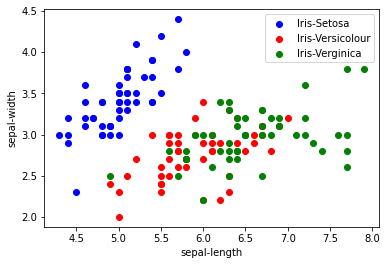

In [4]:
# sepal lengthとsepal widthでクラス別に散布図を描く
import matplotlib.pyplot as plt

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.scatter(df.iloc[0:50, 0], df.iloc[0:50, 1], color='blue', label='Iris-Setosa')
plt.scatter(df.iloc[50:100, 0], df.iloc[50:100, 1], color='red', label='Iris-Versicolour')
plt.scatter(df.iloc[100:150, 0], df.iloc[100:150, 1], color='green', label='Iris-Verginica')

plt.legend()

ここから，実際に相関行列を作成し，主成分分析を行う．まず，データを標準化する．

In [5]:
# Irisデータセットの標準化
df.iloc[:,:4] = (df.iloc[:,:4] - df.iloc[:,:4].mean()) / df.iloc[:,:4].std()
df.head()

,0,1,2,3,4
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa


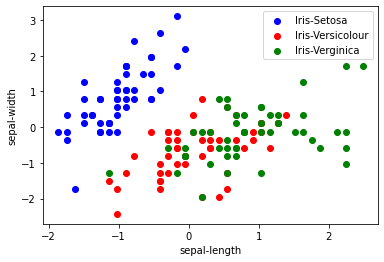

In [6]:
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.scatter(df.iloc[0:50, 0], df.iloc[0:50, 1], color='blue', label='Iris-Setosa')
plt.scatter(df.iloc[50:100, 0], df.iloc[50:100, 1], color='red', label='Iris-Versicolour')
plt.scatter(df.iloc[100:150, 0], df.iloc[100:150, 1], color='green', label='Iris-Verginica')

plt.legend()

続いて分散共分散行列を作成し,それの固有値・固有ベクトルを算出する．

In [7]:
# 分散共分散行列の作成
iris_cov = np.cov(df.iloc[:,:4], rowvar=False)
print(iris_cov)

# 固有値・固有ベクトルの算出
iris_eigen_values, iris_eigen_vectors = np.linalg.eig(iris_cov)


for i, iris_eigen in enumerate(zip(iris_eigen_values, iris_eigen_vectors)):
    print('No.', i)
    print('eigen value:', iris_eigen[0])
    print('eigen vector:', iris_eigen[1])

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]
No. 0
eigen value: 2.9108180837520563
eigen vector: [ 0.52237162 -0.37231836 -0.72101681  0.26199559]
No. 1
eigen value: 0.9212209307072229
eigen vector: [-0.26335492 -0.92555649  0.24203288 -0.12413481]
No. 2
eigen value: 0.14735327830509587
eigen vector: [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
No. 3
eigen value: 0.02060770723562511
eigen vector: [ 0.56561105 -0.06541577  0.6338014   0.52354627]


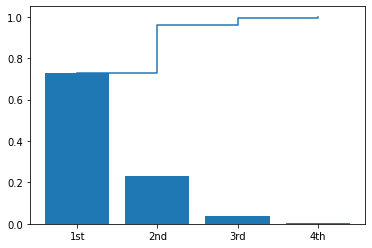

In [8]:
# 寄与率と累積寄与率を算出し，プロットしてみる
plt.bar(['1st', '2nd', '3rd', '4th'], iris_eigen_values / iris_eigen_values.sum())
plt.plot(np.cumsum(iris_eigen_values / iris_eigen_values.sum()), drawstyle='steps-post')

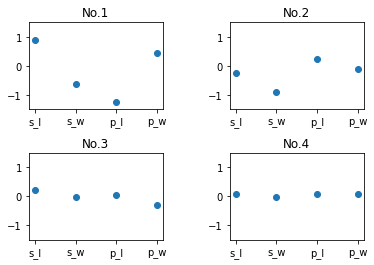

In [9]:
# 各主成分ごとの因子負荷量を算出し，プロットしてみる
fig, axes = plt.subplots(2, 2)

k=0
for i in range(2):
    for j in range(2):
        axes[i, j].scatter(['s_l', 's_w', 'p_l', 'p_w'],
                           np.sqrt(iris_eigen_values[k])*iris_eigen_vectors[k])
        axes[i, j].set_title('No.'+str(k+1))
        axes[i, j].set_ylim([-1.5, 1.5])
        k+=1

plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [10]:
# 特に寄与率の高かった第一主成分と第二主成分を用いて次元削減
df_2dim = df.iloc[:,:4].dot(iris_eigen_vectors[:2,:].T) 
df_2dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [11]:
df_2dim.tail()

,0,1
145,0.375884,-0.138610
146,0.497297,1.093540
147,0.146726,-0.026205
148,-0.364733,-0.806002
149,-0.259570,0.183431


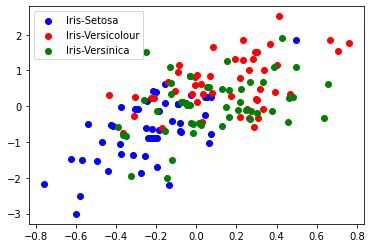

In [12]:
plt.scatter(df_2dim.iloc[:50, 0], df_2dim.iloc[:50, 1], label='Iris-Setosa', color='blue')
plt.scatter(df_2dim.iloc[50:100, 0], df_2dim.iloc[50:100, 1], label='Iris-Versicolour', color='red')
plt.scatter(df_2dim.iloc[100:150, 0], df_2dim.iloc[100:150, 1], label='Iris-Versinica', color='green')
plt.legend()

また，データを標準化しない場合には，異なる結果が得られる．元データの分散の情報が維持できるため，線形分離性を高める場合は標準化を行わない方が良いかも?

In [13]:
df2 = pd.read_csv(iris_url, header=None, encoding='utf-8')
df2.iloc[:,:4] = df2.iloc[:,:4] - df2.iloc[:,:4].mean()

# 分散共分散行列の作成
iris_cov2 = np.cov(df2.iloc[:,:4], rowvar=False)
print(iris_cov2)

# 固有値・固有ベクトルの算出
iris_eigen_values2, iris_eigen_vectors2 = np.linalg.eig(iris_cov2)

# 固有値順でソート
value_index = np.argsort(iris_eigen_values2)[::-1]
iris_eigen_values2 = iris_eigen_values2[value_index]
iris_eigen_vectors2 = iris_eigen_vectors2[value_index]

for i, iris_eigen in enumerate(zip(iris_eigen_values2, iris_eigen_vectors2)):
    print('No.', i)
    print('eigen value:', iris_eigen[0])
    print('eigen vector:', iris_eigen[1])

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
No. 0
eigen value: 4.224840768320108
eigen vector: [ 0.36158968 -0.65653988 -0.58099728  0.31725455]
No. 1
eigen value: 0.24224357162751511
eigen vector: [-0.08226889 -0.72971237  0.59641809 -0.32409435]
No. 2
eigen value: 0.07852390809415467
eigen vector: [ 0.85657211  0.1757674   0.07252408 -0.47971899]
No. 3
eigen value: 0.02368302712600035
eigen vector: [0.35884393 0.07470647 0.54906091 0.75112056]


寄与率も標準化を行った場合と比べてみると面白い．標準化を行わない方が，寄与率が第一主成分に集中している．

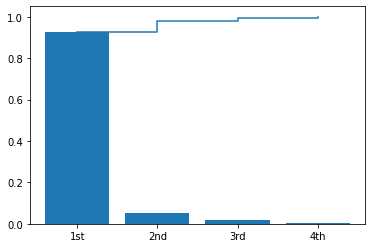

In [14]:
# 寄与率と累積寄与率を算出し，プロットしてみる
plt.bar(['1st', '2nd', '3rd', '4th'], iris_eigen_values2 / iris_eigen_values2.sum())
plt.plot(np.cumsum(iris_eigen_values2 / iris_eigen_values2.sum()), drawstyle='steps-post')

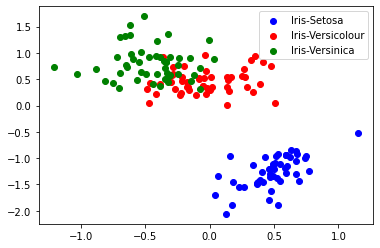

In [15]:
# 特に寄与率の高かった第一主成分と第二主成分を用いて次元削減
df2_2dim = df2.iloc[:,:4].dot(iris_eigen_vectors2[:2,:].T) 

plt.scatter(df2_2dim.iloc[:50, 0], df2_2dim.iloc[:50, 1], label='Iris-Setosa', color='blue')
plt.scatter(df2_2dim.iloc[50:100, 0], df2_2dim.iloc[50:100, 1], label='Iris-Versicolour', color='red')
plt.scatter(df2_2dim.iloc[100:150, 0], df2_2dim.iloc[100:150, 1], label='Iris-Versinica', color='green')
plt.legend()

## 参考文献
---

[固有値，Wikipedia](https://ja.wikipedia.org/wiki/%E5%9B%BA%E6%9C%89%E5%80%A4)

[固有値，固有ベクトルの求め方，geisya.or.jp](https://www.geisya.or.jp/~mwm48961/linear_algebra/eigenvalue2.htm)

[固有値とその応用(pptスライド)](http://www.akita-pu.ac.jp/system/elect/ins/kusakari/japanese/teaching/Old/LinearAlgebra/2009/note/10.pdf)

[固有値と固有ベクトル(pdfファイル)](http://www.osakac.ac.jp/labs/mandai/writings/sd2-02m3-f.pdf)

[固有値の定義と求め方をていねいに～計算の手順～，数学の景色](https://mathlandscape.com/eigenvalue/)

[numpy.linalg.eig，Numpy v1.22 Manual](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

[主成分分析とは，インテージ](https://www.intage.co.jp/glossary/401/)

[主成分分析，Wikipedia](https://ja.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90)

[主成分分析とは？ R を使った分析例や因子分析との違いを解説，Quest](https://quest-research.co.jp/research/principal-component-analysis)

[主成分分析，統計科学研究所](https://statistics.co.jp/reference/software_R/statR_9_principal.pdf)

[主成分分析とは何なのか、とにかく全力でわかりやすく解説する，CORE CONCEPT](https://recruit.cct-inc.co.jp/tecblog/machine-learning/pca-kaisetsu/)

[Rと主成分分析](https://www.cis.doshisha.ac.jp/mjin/R/24/24.html)

[主成分分析とは？因子分析との違いや事例を初心者にも分かりやすく解説，GMO RESERCH](https://gmo-research.jp/research-column/principal-component-analysis)

[主成分分析の考え方，Logistics of Blue](https://logics-of-blue.com/principal-components-analysis/)

[分散共分散行列の定義と性質，高校数学の美しい物語](https://manabitimes.jp/math/1020)

[相関行列の定義と分散共分散行列との関係，高校数学の美しい物語](https://manabitimes.jp/math/1294)

[座標平面上における回転の公式，具体例で学ぶ数学](https://mathwords.net/heimenkaiten)

[行列と一次変換](https://www.geisya.or.jp/~mwm48961/linear_algebra/transform1.htm)

[Iris Data Set，UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris)

[Pythonで正規化・標準化（リスト、NumPy配列、pandas.DataFrame）,note.nkmk.me](https://note.nkmk.me/python-list-ndarray-dataframe-normalize-standardize/)

[numpy.cov，Numpy v1.22 Manual](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)

[因子負荷量](https://www.ouj.ac.jp/mijika/tokei/xml/k3_01006.xml)

[numpy.sqrt，Numpy v1.22 Manual](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html)

[主成分分析で標準偏差で割るべき？に対する議論，Qiita](https://qiita.com/koshian2/items/2e69cb4981ae8fbd3bda)